# 第2スクリーニング　スコアリング　No. 1  
1. 日経テレコンで「高齢者雇用」、「継続雇用」で記事検索を行い、ヒットした記事を落とす
2. テキストマイニングを行い、記事に出てきた企業名を抜き出して登場回数を数え、その数字をスコアとする

In [1]:
import csv
import pandas as pd

In [2]:
cd /Users/shintaro/Downloads

/Users/shintaro/Downloads


In [3]:
csv_file = open("fst.screening2(ver1.5).csv", "r", encoding="utf-8-sig", errors="", newline="" )

f = csv.reader(csv_file, delimiter=",", doublequote=True, lineterminator="\r\n", quotechar='"', skipinitialspace=True)

f = csv.DictReader(csv_file, delimiter=",", doublequote=True, lineterminator="\r\n", quotechar='"', skipinitialspace=True)

In [4]:
fst_screening = pd.read_csv('fst.screening2(ver1.5).csv')
emp1 = pd.read_csv('高齢者雇用.csv')
emp2 = pd.read_csv('継続雇用.csv')

In [5]:
fst_screening_comp = fst_screening['企業名'].tolist()
emp1_comp = emp1['企業名'].tolist()
emp2_comp = emp2['企業名'].tolist()
emp1_count = emp1['登場回数']
emp2_count = emp2['登場回数']

In [6]:
len_1 = len(emp1_comp)
len_2 = len(emp2_comp)

emp1_data = [[]for i in range(len_1)]
emp2_data = [[]for i in range(len_2)]

In [7]:
for i in range(len_1):
    emp1_data[i].append(emp1_comp[i])
    emp1_data[i].append(emp1_count[i])
    
for i in range(len_2):
    emp2_data[i].append(emp2_comp[i])
    emp2_data[i].append(emp2_count[i])

In [8]:
emp1_data_true_tmp = []
emp2_data_true_tmp = []

In [9]:
for i in range(len_1):
    if emp1_data[i][0] in fst_screening_comp:
        emp1_data_true_tmp.append(emp1_data[i])
        
for i in range(len_2):
    if emp2_data[i][0] in fst_screening_comp:
        emp2_data_true_tmp.append(emp2_data[i])

In [10]:
emp1_data_true = []
emp2_data_true = []

In [11]:
for i in range(len(emp1_data_true_tmp)):
    if emp1_data_true_tmp[i] != []:
        emp1_data_true.append(emp1_data_true_tmp[i])
        
for i in range(len(emp2_data_true_tmp)):
    if emp2_data_true_tmp[i] != []:
        emp2_data_true.append(emp2_data_true_tmp[i])

In [12]:
with open("高齢者雇用(ver1.0).csv", "w", encoding="utf-8-sig") as f: 
    writer = csv.writer(f)
    writer.writerow(emp1_data_true)
    
with open("継続雇用(ver1.0).csv", "w", encoding="utf-8-sig") as f: 
    writer = csv.writer(f)
    writer.writerow(emp2_data_true)

In [13]:
data1 = pd.read_csv('高齢者雇用(ver1.0).csv')

In [14]:
len_3 = len(emp1_data_true)
len_4 = len(emp2_data_true)

comp1_data_comp = []
comp2_data_comp = []
comp1_data_count = []
comp2_data_count = []

In [15]:
for i in range(len_3):
    comp1_data_comp.append(emp1_data_true[i][0])
    comp1_data_count.append(emp1_data_true[i][1])
    
for i in range(len_4):
    comp2_data_comp.append(emp2_data_true[i][0])
    comp2_data_count.append(emp2_data_true[i][1])

In [16]:
dict = {'高齢者雇用': comp1_data_comp, '登場回数': comp1_data_count}
df1 = pd.DataFrame(dict)

In [17]:
dict = {'継続雇用': comp2_data_comp, '登場回数': comp2_data_count}
df2 = pd.DataFrame(dict)

In [31]:
df1.to_csv('高齢者雇用(ver1.0).csv', encoding = 'utf-8')

In [19]:
df2.to_csv('継続雇用(ver1.2).csv', encoding = 'utf-8')

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import japanize_matplotlib

In [37]:
Data = pd.read_csv('2ndscreening_Score(ver1.3).csv', encoding = 'Shift_JIS')

In [38]:
Data

Unnamed: 0             企業名  高齢者雇用  継続雇用  DX_Score  SC_Score
0             0             グンゼ      0     1         0         0
1             1           日産自動車      5     6         0         1
2             2              大和      4     9         0         0
3             3            ゼンリン      0     0         0         4
4             4  近鉄グループホールディングス      0     0         5         2
..          ...             ...    ...   ...       ...       ...
214         214            ダスキン      1     2         0         0
215         215          タカラバイオ      0     0         0         0
216         216           三菱重工業      9     9         0        13
217         217            住友化学      4     1         0         0
218         218            北洋銀行      1     2         0         1

[219 rows x 6 columns]

In [40]:
l1 = Data['高齢者雇用'].tolist()
l2 = Data['継続雇用'].tolist()
l3 = Data['DX_Score'].tolist()
l4 = Data['SC_Score'].tolist()
l5 = Data['企業名'].tolist()
len_Data = len(Data)

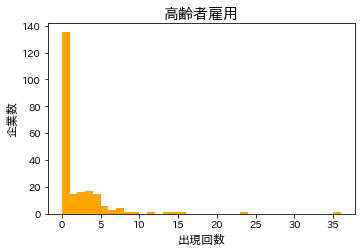

In [64]:
x1 = np.array(l1)
x2 = np.array(l2)
x3 = np.array(l3)
x4 = np.array(l4)

plt.figure(figsize = (5.5, 3.5))
plt.hist(x1, bins = 36, color = 'orange')
plt.title('高齢者雇用', fontsize = 15)
plt.xlabel('出現回数', fontsize = 12)
plt.ylabel('企業数', fontsize = 12)
plt.savefig('score1.png', dpi = 2000)

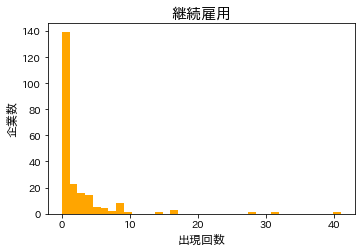

In [65]:
plt.figure(figsize = (5.5, 3.5))
plt.hist(x2, bins = 36, color = 'orange')
plt.title('継続雇用', fontsize = 15)
plt.xlabel('出現回数', fontsize = 12)
plt.ylabel('企業数', fontsize = 12)
plt.savefig('score2.png', dpi = 2000)

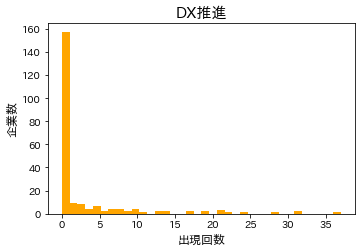

In [66]:
plt.figure(figsize = (5.5, 3.5))
plt.hist(x3, bins = 36, color = 'orange')
plt.title('DX推進', fontsize = 15)
plt.xlabel('出現回数', fontsize = 12)
plt.ylabel('企業数', fontsize = 12)
plt.savefig('score3.png', dpi = 2000)

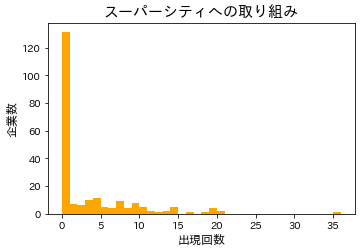

In [68]:
plt.figure(figsize = (5.5, 3.5))
plt.hist(x4, bins = 36, color = 'orange')
plt.title('スーパーシティへの取り組み', fontsize = 15)
plt.xlabel('出現回数', fontsize = 12)
plt.ylabel('企業数', fontsize = 12)
plt.savefig('score4.png', dpi = 2000)

In [86]:
x2

array([ 1,  6,  9,  0,  0,  0,  0,  0,  0,  1,  4,  0,  1,  0,  0,  3,  1,
        3,  3,  0,  1,  0,  0,  1,  2,  0,  3, 28,  3,  0,  2,  1, 41,  7,
        0,  6, 17,  0,  0,  4,  3,  1,  0,  0,  0,  0,  2,  0,  0,  0,  0,
        1,  4,  0,  0,  5,  0,  1,  0,  2,  0,  1,  0,  0,  0,  0,  0,  1,
        3,  0,  0,  1, 14,  7,  0,  0,  4,  5,  0,  1,  0,  1,  2,  1,  0,
        0,  1,  4,  9,  0,  0,  0,  2,  0,  0,  0,  1,  5,  3,  0,  5,  0,
        3,  4,  0,  0,  0,  3,  0,  1,  0,  1,  0,  0,  1,  0,  1,  1,  0,
        0,  0,  0,  0,  2,  1,  8,  1,  9,  0,  1,  0,  1,  8, 31,  0,  2,
        5,  0,  0,  0,  4,  0,  0,  0,  2,  1,  0,  0,  0,  0,  0,  0,  2,
        0,  0,  0,  6,  9,  4,  4,  2,  2,  3,  2,  2,  0,  2,  4,  3,  0,
        6,  0,  2, 10,  0,  0,  0,  0,  1,  0,  3,  0,  0,  1,  0,  0,  0,
        1,  4,  2,  0,  3,  0,  2,  2, 17,  0, 17,  0,  3,  1,  2,  2,  4,
        0,  8,  0,  0,  4,  1,  1,  3,  4,  1,  2,  0,  9,  1,  2])

In [73]:
import collections

In [77]:
cl2 = collections.Counter(l2)

In [79]:
cl2.most_common()

[(0, 103),
 (1, 36),
 (2, 23),
 (3, 16),
 (4, 14),
 (9, 5),
 (5, 5),
 (6, 4),
 (17, 3),
 (8, 3),
 (7, 2),
 (28, 1),
 (41, 1),
 (14, 1),
 (31, 1),
 (10, 1)]

(array([139.,  23.,  16.,  14.,   5.,   4.,   2.,   8.,   1.,   0.,   0.,
          0.,   1.,   0.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.]),
 array([ 0.        ,  1.13888889,  2.27777778,  3.41666667,  4.55555556,
         5.69444444,  6.83333333,  7.97222222,  9.11111111, 10.25      ,
        11.38888889, 12.52777778, 13.66666667, 14.80555556, 15.94444444,
        17.08333333, 18.22222222, 19.36111111, 20.5       , 21.63888889,
        22.77777778, 23.91666667, 25.05555556, 26.19444444, 27.33333333,
        28.47222222, 29.61111111, 30.75      , 31.88888889, 33.02777778,
        34.16666667, 35.30555556, 36.44444444, 37.58333333, 38.72222222,
        39.86111111, 41.        ]),
 <BarContainer object of 36 artists>)

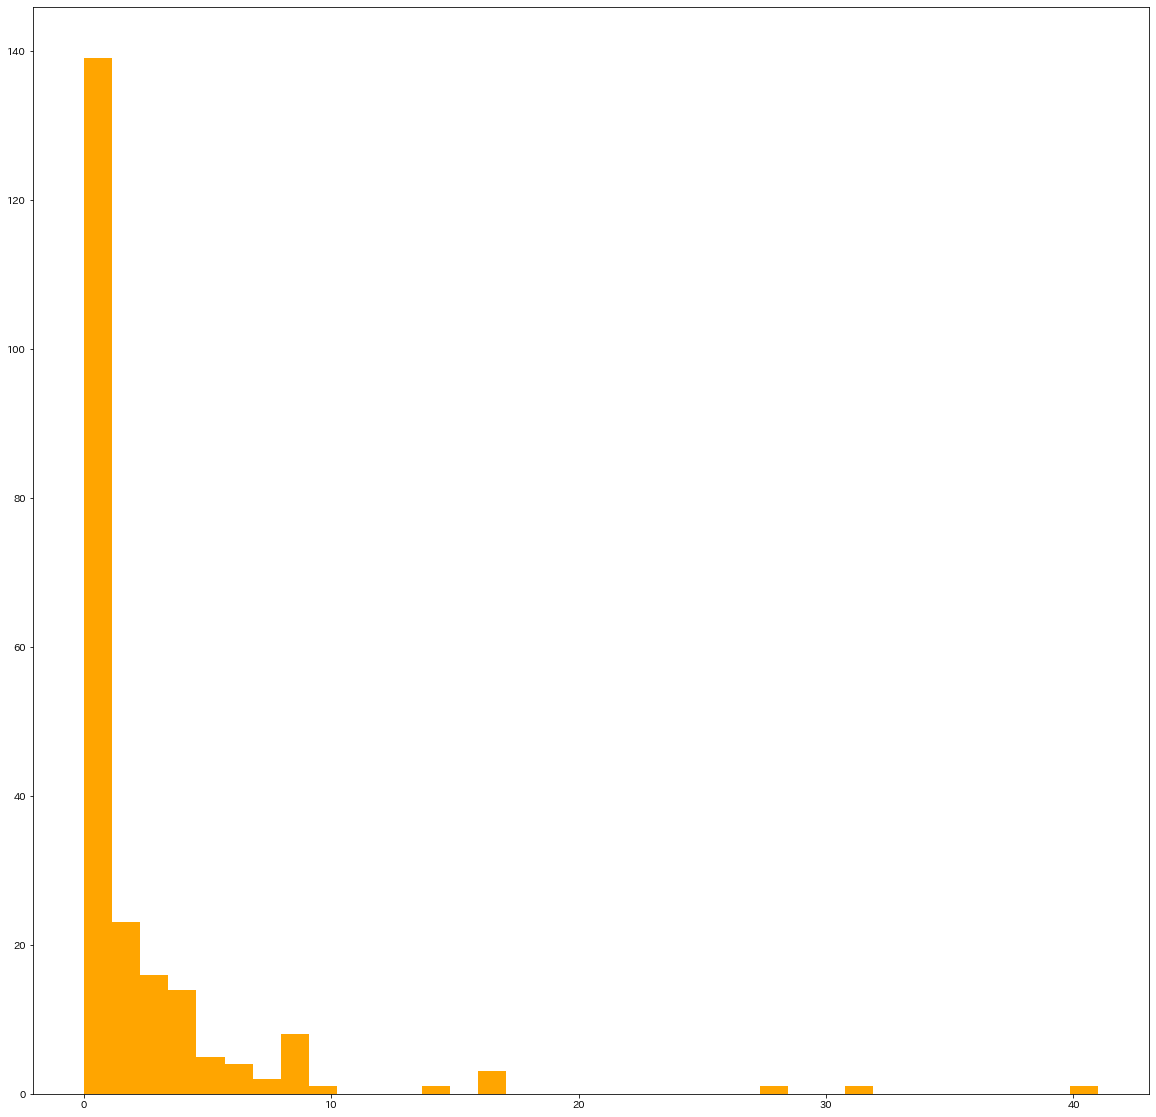

In [82]:
plt.figure(figsize = (20, 20))
plt.hist(x2, bins = 36, color = 'orange')
